In [17]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

import gym
import d4rl

from rlkit.torch.networks import Mlp
import seaborn as sns

In [3]:
env_name = 'halfcheetah-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

17
6


/usr/local/google/home/shideh/virtual_env/ML/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']

In [5]:
print(rewards.shape)

(1000000,)


In [7]:
M = 64
network = Mlp(
        input_size=obs_dim + action_dim,
        output_size=1,
        hidden_sizes=[M, M],
    )

target_network = Mlp(
    input_size=obs_dim + action_dim,
    output_size=1,
    hidden_sizes=[M, M],
)

In [8]:
path = '../models/Nov-03-2020_1648_halfcheetah-medium-v0.pt'
checkpoint = torch.load(path)
network.load_state_dict(checkpoint['network_state_dict'])
target_network.load_state_dict(checkpoint['target_state_dict'])

print('Loading model: {}'.format(path))

Loading model: ../models/Nov-03-2020_1648_halfcheetah-medium-v0.pt


In [9]:
x = torch.from_numpy(obs)
y = torch.from_numpy(actions)
data = torch.cat((x, y), dim=1)
print(data.size())



torch.Size([1000000, 23])


In [10]:
out1 = network(data)
out2 = target_network(data)

In [12]:
print(out1.size())

torch.Size([1000000, 1])


In [14]:
bonus = abs(out1 - out2)
print(bonus.size())

torch.Size([1000000, 1])


/usr/local/google/home/shideh/virtual_env/ML/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

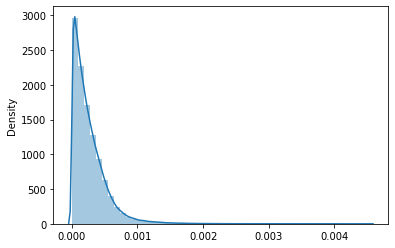

In [18]:
sns.distplot(bonus.detach().cpu().numpy())

/usr/local/google/home/shideh/virtual_env/ML/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

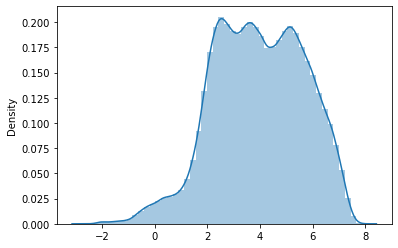

In [19]:
sns.distplot(rewards)

In [25]:
print(max(rewards))

8.103505


In [36]:
reward_rng = max(rewards) - min(rewards)
bonus_rng =(max(bonus) - min(bonus)).detach().numpy()

In [47]:

scale = 2.5
beta = scale *(reward_rng / bonus_rng)

In [48]:
print(beta)

[6018.1006]


#### hopper

In [49]:
env_name = 'hopper-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

11
3


/usr/local/google/home/shideh/virtual_env/ML/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [50]:
dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']

In [51]:
M = 64
network = Mlp(
        input_size=obs_dim + action_dim,
        output_size=1,
        hidden_sizes=[M, M],
    )

target_network = Mlp(
    input_size=obs_dim + action_dim,
    output_size=1,
    hidden_sizes=[M, M],
)

In [53]:
path = '../models/Nov-09-2020_1517_hopper-medium-v0.pt'
checkpoint = torch.load(path, map_location='cpu')
network.load_state_dict(checkpoint['network_state_dict'])
target_network.load_state_dict(checkpoint['target_state_dict'])

print('Loading model: {}'.format(path))

Loading model: ../models/Nov-09-2020_1517_hopper-medium-v0.pt


In [54]:
x = torch.from_numpy(obs)
y = torch.from_numpy(actions)
data = torch.cat((x, y), dim=1)
print(data.size())


torch.Size([1000000, 14])


In [55]:
out1 = network(data)
out2 = target_network(data)

In [56]:
bonus = abs(out1 - out2)


/usr/local/google/home/shideh/virtual_env/ML/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/google/home/shideh/virtual_env/ML/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

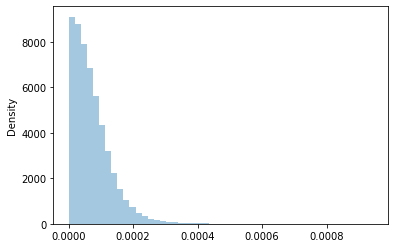

In [57]:
sns.distplot(bonus.detach().cpu().numpy())

/usr/local/google/home/shideh/virtual_env/ML/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

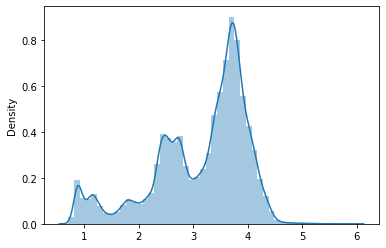

In [58]:
sns.distplot(rewards)

In [59]:
reward_rng = max(rewards) - min(rewards)
bonus_rng =(max(bonus) - min(bonus)).detach().numpy()

In [60]:
scale = 2.5
beta = scale *(reward_rng / bonus_rng)
print(beta)

[13931.733]
